In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [2]:
wints = pickle.load(open('../pickleswinter_SLPS.p','rb'))

wints_AO = pickle.load(open('winter_AO.p','rb'))

hourly_means = pickle.load(open('vorts.p','rb'))

max_coords = pickle.load(open('BSH_points.p', 'rb'))

anoms_array,dayg,levg = pickle.load(open('gph.p','rb'))

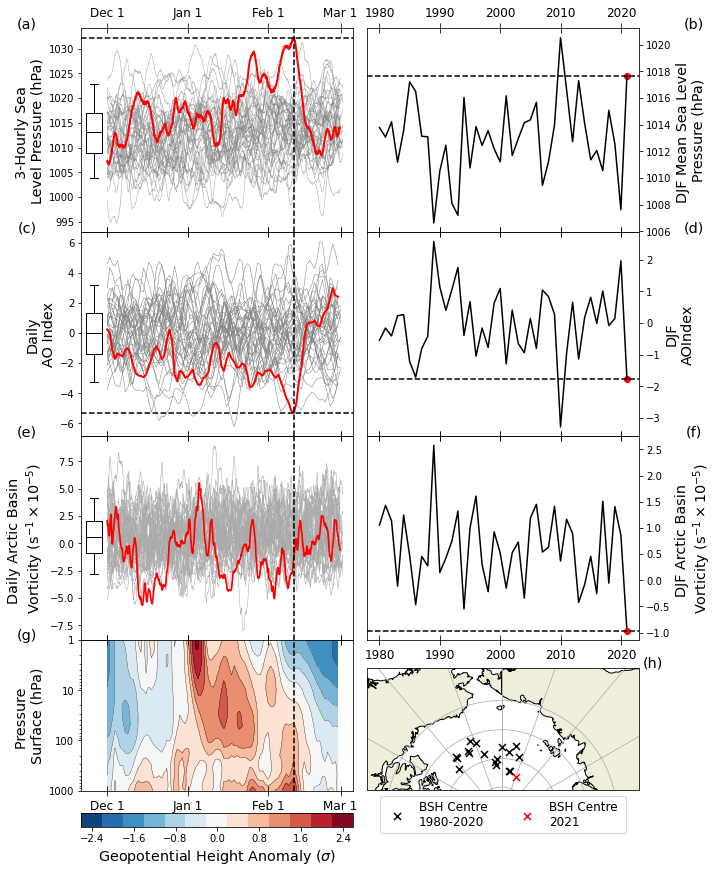

In [3]:
fig, axs = plt.subplots(4,2,figsize=(10,15))

pad = 5

### TOP ROW ###

ax1, ax2 = axs.reshape(-1)[:2]

djf_mean_slps = []
djf_slps = []
maxes = []

for year in range(1980,2022):    

    slps_winter, real_times = wints[year]
    
    if year == 2021:
        color = 'r'
        lw = 2
        alpha=1
    else:
        color = 'gray'
        alpha=0.7
        lw=0.5
    
    ax1.plot(np.array(slps_winter)/100,color=color, lw=lw,alpha=alpha)
    
    djf_mean_slps.append(np.mean(slps_winter))
    djf_slps += slps_winter
    maxes.append(np.max(slps_winter))
    

ax1.boxplot(np.array(djf_slps)/100,positions=[-pad*8],widths=50,sym="",whis=[5,95],
            medianprops=dict(color='k'))
    
slp_max = np.max(maxes)/100
slp_max_ind = np.argmax(wints[2021][0])

ax1.axhline(slp_max, color='k', ls='--')
ax1.axvline(slp_max_ind, color='k', ls='--')

ax1.tick_params('x')

ax1.set_xticks([0,(31)*8,(31+31)*8,(31+31+28)*8])
ax1.xaxis.tick_top()
ax1.set_ylabel('3-Hourly Sea \nLevel Pressure (hPa)', fontsize='x-large')

ax2.plot(range(1980,2022), np.array(djf_mean_slps)/100,color='k')
ax2.scatter(2021,djf_mean_slps[-1]/100,marker='o',color='r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.axhline(djf_mean_slps[-1]/100, color='k',ls='--')
ax2.set_ylabel('DJF Mean Sea Level \nPressure (hPa)', fontsize='x-large')
ax2.xaxis.tick_top()

### SECOND ROW ##############################################################################

ax1, ax2 = axs.reshape(-1)[2:4]

djf_mean_AOs = []
djf_AOs = []

for year in range(1980,2022):    

    real_times, AO = wints_AO[year]
    
    if year == 2021:
        color = 'r'
        lw = 2
        alpha=1
    else:
        color = 'gray'
        lw=0.5
        alpha=0.7
    
    ax1.plot(AO,color=color, lw=lw)
    
    djf_mean_AOs.append(np.mean(AO))
    djf_AOs += AO
    
    if year == 2021:
        fmax = np.min(AO)
        
ax1.boxplot(np.array(djf_AOs),positions=[-pad],widths=50/8,sym="",whis=[5,95],
            medianprops=dict(color='k'))
        
ax1.axhline(fmax, color='k', ls='--')

ax1.axvline(slp_max_ind/8, color='k', ls='--')

ax1.tick_params('x',rotation=45)

ax1.set_xticks([0,(31)*1,(31+31)*1,(31+31+28)*1])
ax1.set_ylabel('Daily\nAO Index', fontsize='x-large')

ax2.plot(range(1980,2022), djf_mean_AOs,color='k')
ax2.scatter(2021, djf_mean_AOs[-1],color='r',marker='o')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.axhline(djf_mean_AOs[-1], color='k',ls='--')
ax2.set_ylabel('DJF\nAOIndex', fontsize='x-large')
ax2.set_xticks(range(1980,2022,10))

### THIRD ROW ###

ax1, ax2 = axs.reshape(-1)[4:6]

years = range(1980,2022)

ann_means = []
vorts_3h = []

for counter, year in enumerate(years):
    
    if year == 2021:
        color = 'r'
        lw=1.7
        alpha=1
    else:
        color = 'darkgray'
        lw=0.5
        alpha=0.5
    
    ax1.plot(hourly_means[counter],color=color,lw=lw)
    vorts_3h += hourly_means[counter]
    
    ann_means.append(np.mean(hourly_means[counter]))
    
ax1.boxplot(np.array(vorts_3h),positions=[-pad*8],widths=50,sym="",whis=[5,95],
            medianprops=dict(color='k'))

ax1.axvline(slp_max_ind, color='k', ls='--')
    
ax2.plot(years,ann_means,color='k')

unit = r'(s$^{-1} \times 10^{-5}$)'

ax1.set_xticks([0,(31)*8,(31+31)*8,(31+31+28)*8])
ax1.set_ylabel(f'Daily Arctic Basin \nVorticity {unit}', fontsize='x-large')

ax2.yaxis.tick_right()
ax2.plot(2021,ann_means[-1],marker='o',color='r')
ax2.yaxis.set_label_position("right")
ax2.axhline(ann_means[-1], color='k',ls='--')
ax2.set_ylabel(f'DJF Arctic Basin \nVorticity {unit}', fontsize='x-large')

ax2.set_xticks(range(1980,2022,10))
ax2.set_xticklabels(range(1980,2022,10),fontsize='large')


plt.subplots_adjust(wspace=0.05,hspace=0.0)

### BOTTOM LEFT ##############################################################################

yticks = [1000,100,10,1]

levels = np.arange(-2.6,2.61,0.4)

ax = axs.reshape(-1)[-2]



c = ax.contourf(dayg,
                levg,
                anoms_array.T,
                cmap='RdBu_r',
                vmin=levels[0],
                vmax=levels[-1],
                levels=levels)

ax.contour(dayg,
        levg,
        anoms_array.T,
        levels=levels,
           linewidths=0.3,
           linestyles='solid',
          colors='k')

ax.axvline(slp_max_ind/8, color='k', ls='--',zorder=10)

ax.set_yscale('log')

ax.invert_yaxis()
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

ax.set_xticks([0,31,31+31,31+31+28])
ax.set_ylabel('Pressure \nSurface (hPa)',fontsize='x-large')

cb = fig.colorbar(c,ax=ax,orientation='horizontal',pad= 0.11)
cb.set_ticks(levels[::2]+0.2)
cb.set_label(r'Geopotential Height Anomaly ($\sigma$)',fontsize='x-large')


### BOTTOM RIGHT ##############################################################################

axs.reshape(-1)[-1].remove()

ax = fig.add_subplot(4,2,8,projection=ccrs.NorthPolarStereo())

ax.scatter([x[0] for x in max_coords[:-1]],
           [x[1] for x in max_coords[:-1]],
           color='k',
           s=50,
           marker='x',transform=ccrs.PlateCarree(),zorder=5,
           label='BSH Centre \n1980-2020')

ax.scatter([x[0] for x in max_coords[-1:]],
           [x[1] for x in max_coords[-1:]],
           color='r',
           s=50,
           marker='x',transform=ccrs.PlateCarree(),zorder=5,
           label='BSH Centre \n2021')

# print([x[0] for x in max_coords[-1:]],
#            [x[1] for x in max_coords[-1:]])

ax.set_extent([-2.633e+06, 2.696e+06, 5e5, 2.9e+06], crs=ccrs.NorthPolarStereo()) 

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.legend(fontsize='large',ncol=2,loc='lower center',bbox_to_anchor=(0.5,-0.4))

ax.annotate(text=f'(h)',xy=(1.05,1),xycoords='axes fraction', fontsize='x-large',ha='center')  

gl = ax.gridlines(draw_labels=False)

# gl.xlocator = mticker.FixedLocator([])
gl.xlocator = mticker.FixedLocator(np.concatenate([np.arange(-180,-90,20),np.arange(180,89,-20)]))
# gl.xformatter = LONGITUDE_FORMATTER
# gl.xlabel_style = {'size': 12, 'color': 'k','rotation':0}


gl.yformatter = LATITUDE_FORMATTER
gl.ylocator = mticker.FixedLocator(np.arange(70,86,5))

gl.left_labels=False
gl.bottom_labels=False

box = ax.get_position()

box.y0 = box.y0 + 0.012
box.y1 = box.y1 + 0.012

ax.set_position(box)


############################################################


ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 = axs.reshape(-1)

ax1.set_xlim(-(2*pad)*8,(90+pad)*8)
ax3.set_xlim(-(2*pad),(90+pad))
ax5.set_xlim(-(2*pad)*8,(90+pad)*8)
ax7.set_xlim(-(2*pad),(90+pad))

ax2.set_xticks(range(1980,2022,10))
ax2.set_xticklabels(range(1980,2022,10),fontsize='large')

for ax in axs.reshape(-1)[2:5]:
    ax.set_xticklabels([])
    
for ax in axs.reshape(-1)[:7]:
    ax.xaxis.set_ticks_position('both')

for ax in axs.reshape(-1):
    ax.set_facecolor('none')
    
for ax in [ax1, ax7]:
    ax.set_xticklabels(['Dec 1', 'Jan 1', 'Feb 1', 'Mar 1'],fontsize='large')
    
for ax in axs.reshape(-1)[:-1]:
    ax.tick_params(axis="x", direction='inout',length=10)

switcher = 1
for ax, letter in zip(axs.reshape(-1),['a','b','c','d','e','f','g','h']):
    
    x = -0.2 if switcher>0 else 1.2
    ax.annotate(text=f'({letter})',xy=(x,1),xycoords='axes fraction', fontsize='x-large',ha='center')
    switcher = switcher *-1
    
overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/Beaufort'
plt.savefig(f'{overleaf_dir}/fig1.jpg',dpi=500,bbox_inches='tight')

In [51]:
pickle.dump(djf_mean_AOs, open('djf_mean_AOs.p', 'wb'))

In [20]:
djf_slps[0]

[99935.85089311429,
 99842.98535543667,
 99749.56885299749,
 99688.75592752981,
 99645.03274992044,
 99596.81497574967,
 99559.15703573954,
 99540.41185332337,
 99541.5701514185,
 99524.94881336825,
 99497.30891441376,
 99497.14124303497,
 99528.16809129169,
 99540.44061025631,
 99541.96511267348,
 99573.74105514772,
 99582.96328308647,
 99583.8119758902,
 99582.63865191882,
 99596.59250323792,
 99620.46854074112,
 99612.6533194519,
 99592.47274301821,
 99596.19886489448,
 99573.9787133889,
 99552.2739162308,
 99527.93903062647,
 99510.06592417497,
 99508.20774806976,
 99494.68677376676,
 99477.9468692859,
 99503.28470366354,
 99524.70678155137,
 99544.65147415965,
 99562.12056801867,
 99609.67871412572,
 99645.3104655333,
 99681.89108427135,
 99716.41555737385,
 99770.46112071755,
 99818.16099099867,
 99892.35405152875,
 99957.8331263576,
 100076.27357646574,
 100196.64514407587,
 100303.57366882774,
 100365.37032205657,
 100452.46572001645,
 100508.89886179751,
 100552.79251691932,
 

In [4]:
ann_means

[1.054184420149345,
 1.4314200510307324,
 1.1370308371369369,
 -0.11069570613595821,
 1.2471984180276254,
 0.471323067248999,
 -0.4687343001188369,
 0.4560969858867414,
 0.2750983683978534,
 2.578990370278488,
 0.14798269537240769,
 0.4236506873704481,
 0.7484653378672153,
 1.3230308349822053,
 -0.5453514350614979,
 0.9989341118388297,
 1.6081589891736774,
 0.3007277194940598,
 -0.21792900647833294,
 0.9255404269598796,
 0.5220962797427193,
 -0.1508148939794181,
 0.5290894864869441,
 0.7310390530952637,
 -0.3411067639754721,
 1.1889864499019407,
 1.451690424826821,
 0.5394654006367802,
 0.6312634508087681,
 1.413029595986892,
 0.36860724710602283,
 1.167372889984228,
 0.8906248208718534,
 -0.4234253712507366,
 -0.07995853970537416,
 0.4577947793908407,
 -0.25637814947023185,
 1.510513314994539,
 -0.05521305836715311,
 1.4075889316231485,
 0.8618478138464248,
 -0.9628382295695382]

In [12]:
ann_means[-1]

-0.3288853

In [5]:
std = np.std(ann_means[:-1])
mean = np.mean(ann_means[:-1])

(ann_means[-1]-mean)/std

-2.332759571729959

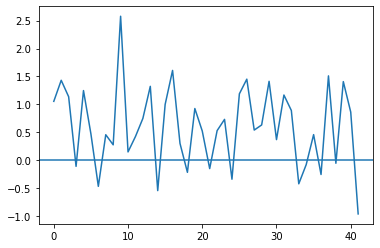

In [6]:
plt.plot(np.array(ann_means))
plt.axhline(0)